<a href="https://colab.research.google.com/github/YoheiFukuhara/keras-for-beginner/blob/master/RNN02_RNN_no_seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 単純なRNNをKerasで実装(最終出力のみ使用)
ブログ記事[「【Keras入門(6)】単純なRNNモデル定義(最終出力のみ使用)」](https://qiita.com/FukuharaYohei/items/39f865bb53cdd5052179)で解説<br>
Kerasで単純なRNNを実装します。<br>
等差数列が増加か減少かを判断します。

In [0]:
from random import randint

import numpy as np
import matplotlib.pyplot as plt

# TensorFlowに統合されたKerasを使用
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

## 前処理
訓練データ作成<br>
目的変数(x_train): 10要素の配列で、第1要素が-20から20までの乱数。第2要素以降は1ずつ増加/減少。<br>
説明変数(y_train): 増加する等差数列の場合は0、減少の場合は1

In [0]:
NUM_RNN = 10
NUM_DATA = 200

# 空の器を作成
x_train = np.empty((0, NUM_RNN))
y_train = np.empty((0, 1))

In [0]:
for i in range(NUM_DATA):
    num_random = randint(-20, 20)
    if i % 2 == 1:  # 奇数の場合
        x_train = np.append(x_train, np.linspace(num_random, num_random+NUM_RNN-1, num=NUM_RNN).reshape(1, NUM_RNN), axis=0)
        y_train = np.append(y_train, np.zeros(1).reshape(1, 1), axis=0)
    else: # 偶数の場合
        x_train = np.append(x_train, np.linspace(num_random, num_random-NUM_RNN+1, num=NUM_RNN).reshape(1, NUM_RNN), axis=0)
        y_train = np.append(y_train, np.ones(1).reshape(1, 1), axis=0)

x_train = x_train.reshape(NUM_DATA, NUM_RNN, 1)
y_train = y_train.reshape(NUM_DATA, 1)

## RNNモデル定義
Kerasを使ってRNNモデル定義

In [0]:
NUM_DIM = 16  # 中間層の次元数

In [5]:
model = Sequential()

# return_sequenceがFalseなので最後のRNN層のみが出力を返す
model.add(SimpleRNN(NUM_DIM, batch_input_shape=(None, NUM_RNN, 1), return_sequences=False))
model.add(Dense(1, activation='sigmoid'))  #全結合層
model.compile(loss='binary_crossentropy', optimizer='adam')

model.summary()

W0730 21:04:39.168461 140091994875776 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0730 21:04:39.351006 140091994875776 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 16)                288       
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [6]:
print(x_train.shape)
print(y_train.shape)

history = model.fit(x_train, y_train, epochs=30, batch_size=8)

(200, 10, 1)
(200, 1)
Epoch 1/30
200/200 [==============================] - 1s 4ms/sample - loss: 0.5816
Epoch 2/30
200/200 [==============================] - 0s 338us/sample - loss: 0.5329
Epoch 3/30
200/200 [==============================] - 0s 389us/sample - loss: 0.5047
Epoch 4/30
200/200 [==============================] - 0s 349us/sample - loss: 0.4764
Epoch 5/30
200/200 [==============================] - 0s 362us/sample - loss: 0.4515
Epoch 6/30
200/200 [==============================] - 0s 343us/sample - loss: 0.4257
Epoch 7/30
200/200 [==============================] - 0s 347us/sample - loss: 0.3986
Epoch 8/30
200/200 [==============================] - 0s 320us/sample - loss: 0.3714
Epoch 9/30
200/200 [==============================] - 0s 376us/sample - loss: 0.3426
Epoch 10/30
200/200 [==============================] - 0s 332us/sample - loss: 0.3206
Epoch 11/30
200/200 [==============================] - 0s 333us/sample - loss: 0.2972
Epoch 12/30
200/200 [======================

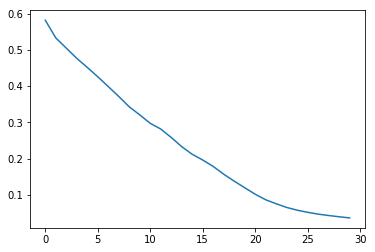

In [7]:
loss = history.history['loss']

plt.plot(np.arange(len(loss)), loss) # np.arangeはlossの連番数列を生成(今回はepoch数の0から29)
plt.show()

In [8]:
# データ数(10回)ループ
for i in range(10):
    y_pred = model.predict(x_train[i].reshape(1, NUM_RNN, 1))
    print(y_pred[0], ':', x_train[i].reshape(NUM_RNN))

[0.9673256] : [ -6.  -7.  -8.  -9. -10. -11. -12. -13. -14. -15.]
[0.01308651] : [-6. -5. -4. -3. -2. -1.  0.  1.  2.  3.]
[0.9779032] : [12. 11. 10.  9.  8.  7.  6.  5.  4.  3.]
[0.01788531] : [-2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]
[0.9629863] : [ -3.  -4.  -5.  -6.  -7.  -8.  -9. -10. -11. -12.]
[0.0345602] : [ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
[0.9410806] : [ 0. -1. -2. -3. -4. -5. -6. -7. -8. -9.]
[0.02115229] : [-11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.]
[0.9629863] : [ -3.  -4.  -5.  -6.  -7.  -8.  -9. -10. -11. -12.]
[0.02194174] : [16. 17. 18. 19. 20. 21. 22. 23. 24. 25.]


In [9]:
!pip freeze

absl-py==0.7.1
alabaster==0.7.12
albumentations==0.1.12
altair==3.1.0
astor==0.8.0
astropy==3.0.5
atari-py==0.1.15
atomicwrites==1.3.0
attrs==19.1.0
audioread==2.1.8
autograd==1.2
Babel==2.7.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.0.4
boto==2.49.0
boto3==1.9.189
botocore==1.12.189
Bottleneck==1.2.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.1
certifi==2019.6.16
cffi==1.12.3
chainer==5.4.0
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.1.3
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.14.6
cvxopt==1.2.3
cvxpy==1.0.15
cycler==0.10.0
cymem==2.0.2
Cython==0.29.12
daft==0.0.4
dask==1.1.5
dataclasses==0.6
datascience==0.10.6
decorator==4.4.0
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.0
distributed==1.25.3
Django==2.2.3
dlib==19.16.0
dm-sonnet==1.34
docopt==0.6.2
docutils==0.14
dopamine-rl==1.0.5
easy